**Data Science & Business Analytics Task-2**

 Topic: Prediction Using Unsupervised ML
 Author: Mitali Patil

**Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
%matplotlib inline

**Reading Data**

In [2]:
iris=load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

**Data Exploration**

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.shape

(150, 4)

**KMeans Clustering**

In [9]:
x=df.iloc[:,[0,1,2,3]].values

In [10]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

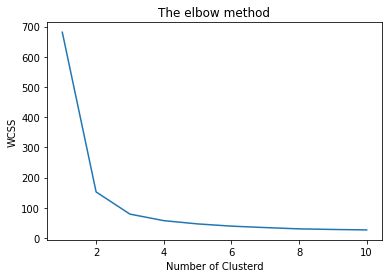

In [11]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusterd')
plt.ylabel('WCSS')
plt.show()

In [13]:

kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y=kmeans.fit_predict(x)

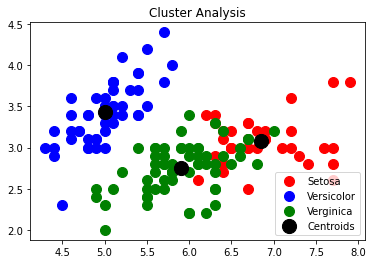

In [14]:
plt.title('Cluster Analysis')
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='red',label='Setosa')
plt.scatter(x[y==1,0],x[y==1,1],s=100,c='blue',label='Versicolor')
plt.scatter(x[y==2,0],x[y==2,1],s=100,c='green',label='Verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids')
plt.legend()